### Necessary imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

### **What are we creating?**

We are creating a simple Neural Network to mimic the function: \
`y = (2 * x) - 1` \
Here `x` is the input & `y` is output.

### Making sample input

In [ ]:
x = np.array([-1.0,0.0,1.0,2.0,3.0,4.0,5.0], dtype=float)
y = np.array([-3.0,-1.0,1.0,3.0,5.0,7.0,9.0], dtype=float)

### instantiate the model Method 1

In [ ]:
# we are defining a sequential layer
# the neurons are connected to each other, making it dense. Hence, dense connection
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=[1]) 
        # units tell how many neurons in the layer
        # when defining first, here only 1, layer in the network, mention the input shape
])

### instantiate the model Method 2

In [ ]:
my_layer = tf.keras.layers.Dense(units=1, input_shape=[1])

model = tf.keras.Sequential([my_layer])

### Train the model

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(x,y,epochs=600)

Epoch 1/600
1/1 [==============================] - 2s 2s/step - loss: 34.5768
Epoch 2/600
1/1 [==============================] - 0s 6ms/step - loss: 24.1193
Epoch 3/600
1/1 [==============================] - 0s 10ms/step - loss: 16.9196
Epoch 4/600
1/1 [==============================] - 0s 8ms/step - loss: 11.9611
Epoch 5/600
1/1 [==============================] - 0s 8ms/step - loss: 8.5442
Epoch 6/600
1/1 [==============================] - 0s 11ms/step - loss: 6.1880
Epoch 7/600
1/1 [==============================] - 0s 11ms/step - loss: 4.5614
Epoch 8/600
1/1 [==============================] - 0s 5ms/step - loss: 3.4369
Epoch 9/600
1/1 [==============================] - 0s 10ms/step - loss: 2.6577
Epoch 10/600
1/1 [==============================] - 0s 9ms/step - loss: 2.1163
Epoch 11/600
1/1 [==============================] - 0s 7ms/step - loss: 1.7385
Epoch 12/600
1/1 [==============================] - 0s 14ms/step - loss: 1.4734
Epoch 13/600
1/1 [==============================] - 0

### Prediction

In [ ]:
print(model.predict([10]))
print(model.predict([11]))
print(model.predict([12]))

[[18.991243]]
[[20.98984]]
[[22.988436]]


### Inspecting the neuron by looking at my_layer using it’s get_weights() parameter:

In [ ]:
print(my_layer.get_weights())

[array([[1.9985955]], dtype=float32), array([-0.994711], dtype=float32)]


`Note` Here, notice that you get back two arrays. The first contains the w value -- which after running for 600 epochs gives you a value that’s very close to 2! Similarly the second contains the b value, which got learned to be very close to -1.

### Using a multiple neural network that looks like this

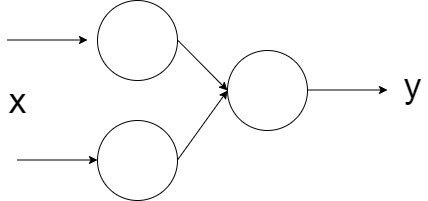

#### A neural Network with 2 layers:
 
Layer 1: 2 Neurons \
Layer 2: 1 Neuron

In [ ]:
my_layer_1 = tf.keras.layers.Dense(units=2, input_shape=[1]) # or write: my_layer_1 = keras.layers.Dense(units=2, input_shape=[1])

my_layer_2 = keras.layers.Dense(units=1)

model = tf.keras.Sequential([my_layer_1, my_layer_2])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 595ms/step - loss: 32.9890
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 19.8405
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 12.3867
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 6.9704
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 3.4597
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 1.7250
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 1.0920
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8981
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 0.8262
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7818
Epoch 11/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7438
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 0.7083
Epoch 13/500
1/1 [==============================] - 0s 1

`Note` So, if you look at the parameters in this case, there’ll be a little bit of a difference in the second layer. Typically we have said that our neuron has an input, x, and an output, y, and y will equal wx+b, where w and b are learned parameters. However, when we have 2 inputs, as you can see above, what will happen is that the formula will change where there is a separate w for each input. 

 

The neuron in the second layer has 2 inputs, so it will, instead of having y = w*x+b, it will have y = w1*x1+w2*x2+b, where x1 is the output of the first neuron in the previous layer, and x2 is the output of the second neuron in the previous layer. Naturally, if there are more than 2 neurons in the previous layer, then that number of weights will be learned.

In [ ]:
print(model.predict([10]))

[[18.999996]]


In [ ]:
# inspecting the parameters:
print(my_layer_1.get_weights())
print(my_layer_2.get_weights())

[array([[-1.4605675 ,  0.18598841]], dtype=float32), array([ 0.52054614, -0.01225503], dtype=float32)]
[array([[-1.3874303 ],
       [-0.14213984]], dtype=float32), array([-0.27951834], dtype=float32)]


In [ ]:
layer1_w1 = (my_layer_1.get_weights()[0][0][0])
print(layer1_w1)

-1.4605675


In [ ]:
# Manual Inspection 
value_to_predict = 10.0

layer1_w1 = (my_layer_1.get_weights()[0][0][0])

layer1_w2 = (my_layer_1.get_weights()[0][0][1])

layer1_b1 = (my_layer_1.get_weights()[1][0])

layer1_b2 = (my_layer_1.get_weights()[1][1])




layer2_w1 = (my_layer_2.get_weights()[0][0])

layer2_w2 = (my_layer_2.get_weights()[0][1])

layer2_b = (my_layer_2.get_weights()[1][0])

 

neuron1_output = (layer1_w1 * value_to_predict) + layer1_b1

neuron2_output = (layer1_w2 * value_to_predict) + layer1_b2

 

neuron3_output = (layer2_w1 * neuron1_output) + (layer2_w2 * neuron2_output) + layer2_b

 

print(neuron3_output)

[18.999996]


### Conclusions
From everything above we can infer that Neural Network 2 is better than Neural Network 1, even when NN 1 was trained on 600 epochs and NN 2 was trained on 500 epochs